In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [2]:
df = pd.read_csv('../data/clean_reclean/time_series.csv')  # Ajuste le chemin si besoin

# Création de la colonne datetime
df['Date'] = pd.to_datetime(df['YrSold'].astype(str) + '-' + df['MoSold'].astype(str) + '-01')

# Agrégation mensuelle
monthly_avg = df.groupby('Date')['SalePrice'].median().reset_index()
monthly_avg.columns = ['Date', 'AverageSalePrice']

# Mise en index datetime
monthly_avg.set_index('Date', inplace=True)
monthly_avg.index.name = 'Date'

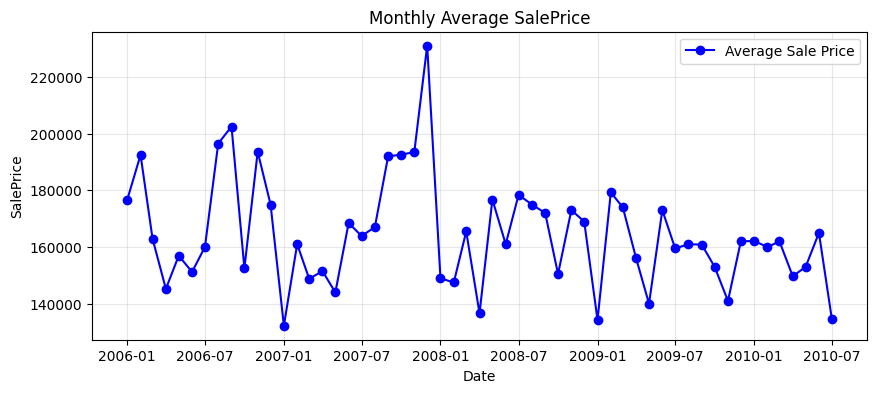

In [3]:
plt.figure(figsize=(10, 4))
plt.plot(monthly_avg, label='Average Sale Price', marker='o', linestyle='-', color='blue')
plt.grid(True, alpha=0.3)
plt.title('Monthly Average SalePrice')
plt.xlabel('Date')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

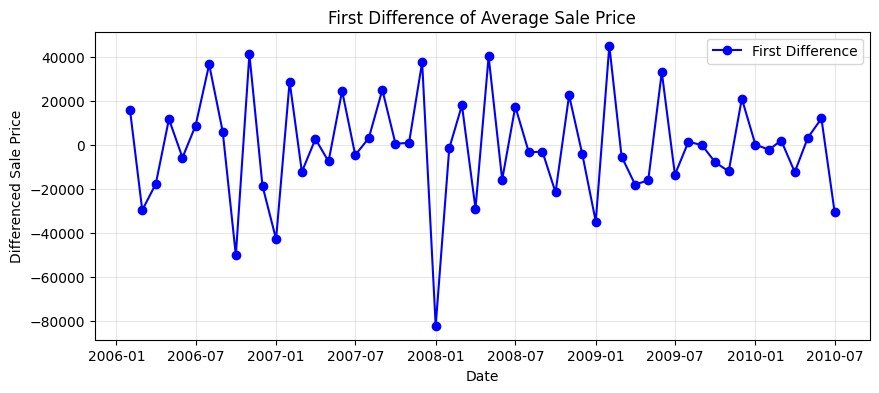

In [4]:
monthly_diff = monthly_avg['AverageSalePrice'].diff().dropna()

plt.figure(figsize=(10, 4))
plt.plot(monthly_diff, label='First Difference', marker='o', linestyle='-', color='blue')
plt.grid(True, alpha=0.3)
plt.title('First Difference of Average Sale Price')
plt.xlabel('Date')
plt.ylabel('Differenced Sale Price')
plt.legend()
plt.show()

In [5]:
X_orig = np.arange(len(monthly_avg)).reshape(-1, 1)
X_orig_const = sm.add_constant(X_orig)
y_orig = monthly_avg['AverageSalePrice'].values
model_orig = sm.OLS(y_orig, X_orig_const).fit()
original_p_values = model_orig.pvalues[1]
print(f"Original series trend p-value: {original_p_values:.4f}")

Original series trend p-value: 0.0660


In [6]:
log_avg = np.log(monthly_avg['AverageSalePrice'])
log_diff = log_avg.diff().dropna()

X_log_diff = np.arange(len(log_diff)).reshape(-1, 1)
X_log_diff_const = sm.add_constant(X_log_diff)
y_log_diff = log_diff.values
model_log_diff = sm.OLS(y_log_diff, X_log_diff_const).fit()
log_diff_p_value = model_log_diff.pvalues[1]
print(f"Log-differenced series trend p-value: {log_diff_p_value:.4f}")

Log-differenced series trend p-value: 0.8511


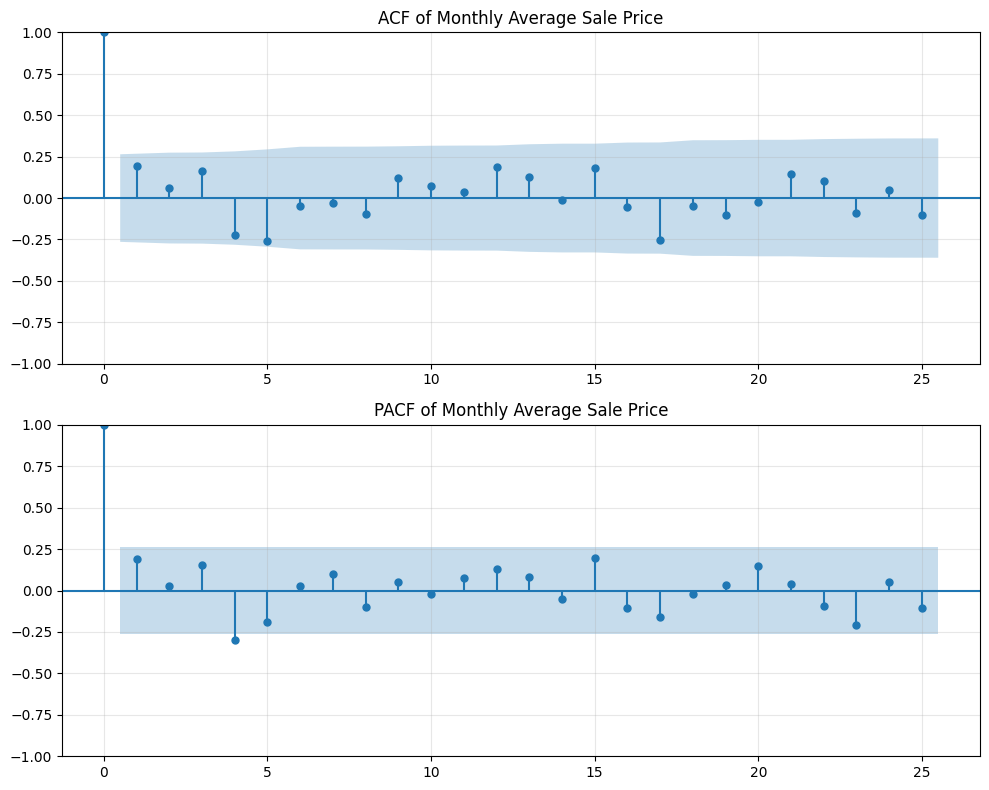

In [7]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

plot_acf(monthly_avg, lags=25, ax=axes[0])
axes[0].set_title('ACF of Monthly Average Sale Price')
axes[0].grid(True, alpha=0.3)

plot_pacf(monthly_avg, lags=25, ax=axes[1])
axes[1].set_title('PACF of Monthly Average Sale Price')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [8]:
print(monthly_avg)

            AverageSalePrice
Date                        
2006-01-01          176700.0
2006-02-01          192500.0
2006-03-01          162900.0
2006-04-01          145250.0
2006-05-01          156950.0
2006-06-01          151200.0
2006-07-01          160000.0
2006-08-01          196500.0
2006-09-01          202500.0
2006-10-01          152500.0
2006-11-01          193605.0
2006-12-01          175000.0
2007-01-01          132250.0
2007-02-01          161000.0
2007-03-01          148800.0
2007-04-01          151500.0
2007-05-01          144000.0
2007-06-01          168500.0
2007-07-01          163900.0
2007-08-01          167000.0
2007-09-01          192000.0
2007-10-01          192570.5
2007-11-01          193500.0
2007-12-01          231000.0
2008-01-01          149000.0
2008-02-01          147500.0
2008-03-01          165500.0
2008-04-01          136625.0
2008-05-01          176750.0
2008-06-01          161000.0
2008-07-01          178400.0
2008-08-01          175000.0
2008-09-01    

In [9]:
# from pmdarima import auto_arima

# model = auto_arima(
#     monthly_avg,
#     seasonal=True,
#     m=12,  # Monthly data
#     trace=True,
#     error_action='ignore',
#     suppress_warnings=True,
#     stepwise=True
# )

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is ava

                                   Model  Forecast Error Variance
0   ARIMA(1, 1, 4) x SARIMA(0, 0, 0, 12)             3.842325e+08
1   ARIMA(2, 1, 4) x SARIMA(0, 0, 0, 12)             4.268281e+08
2   ARIMA(0, 1, 4) x SARIMA(0, 0, 0, 12)             4.671220e+08
3   ARIMA(2, 0, 4) x SARIMA(0, 0, 0, 12)             4.856919e+08
4   ARIMA(1, 0, 4) x SARIMA(0, 0, 0, 12)             4.877085e+08
5   ARIMA(2, 1, 4) x SARIMA(1, 1, 0, 12)             7.025845e+08
6   ARIMA(2, 0, 4) x SARIMA(1, 1, 0, 12)             7.901999e+08
7   ARIMA(2, 0, 4) x SARIMA(0, 1, 0, 12)             9.562341e+08
8   ARIMA(0, 2, 4) x SARIMA(0, 0, 0, 12)             9.599776e+08
9   ARIMA(2, 2, 4) x SARIMA(0, 0, 0, 12)             1.019048e+09
10  ARIMA(2, 1, 4) x SARIMA(0, 1, 0, 12)             1.043168e+09
11  ARIMA(1, 2, 4) x SARIMA(0, 0, 0, 12)             1.083227e+09
12  ARIMA(2, 1, 4) x SARIMA(1, 1, 1, 12)             2.464000e+09
13  ARIMA(0, 0, 4) x SARIMA(0, 0, 0, 12)             3.025313e+10
14  ARIMA(

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


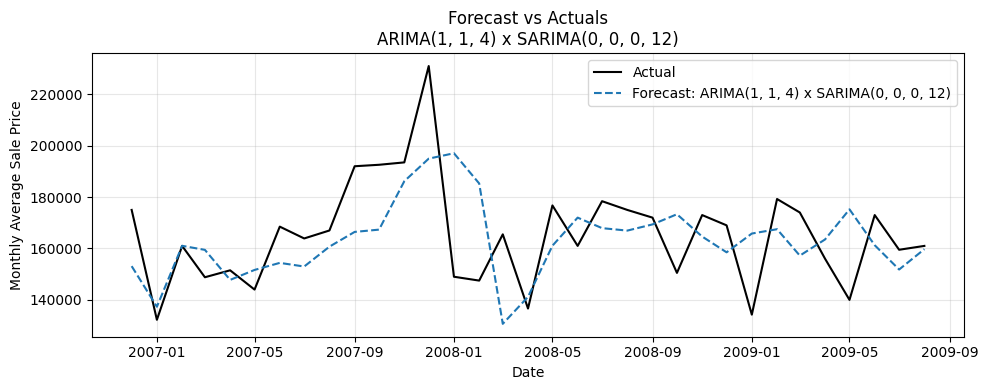

[161302.24903679 159342.56259094 157543.47802181 153989.25059077
 158208.74456073 154145.72445839 151492.01697752 148333.32375097
 159759.11601536 165876.05340797 159396.94109497 183659.53197221
 202081.34955852 198521.48723439 179023.59124632 132244.95848102
 130098.75275445 182387.64211645 176476.63567871 168322.48129681
 167527.72810826 169279.13493515 173679.83269032 164525.97717797
 158317.99740932 164863.71474074 155199.07166683 141363.71291062
 163531.37494127 175157.75122743 162110.80036894 152691.217814
 158911.22903907]


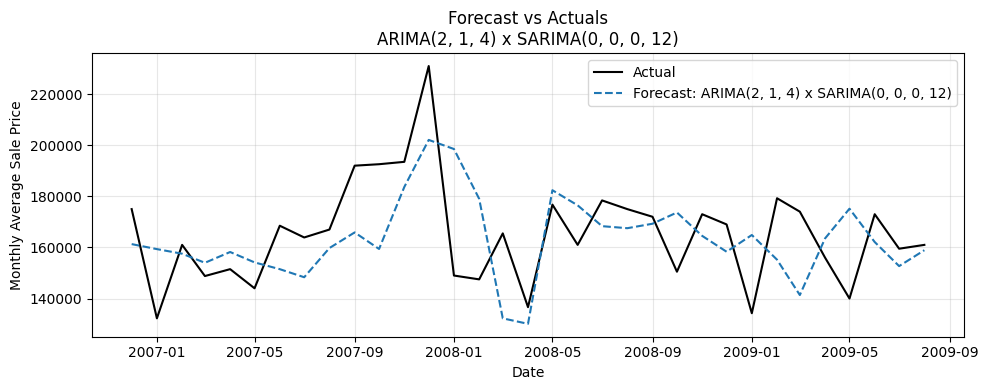

In [10]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Split dataset,
n = len(monthly_avg)
split = int(n * 0.8)  # 80% for training, 20% for testing
split2 = int(n * 0.2) 
train = pd.concat([monthly_avg.iloc[:split2], monthly_avg.iloc[split:]])
test = monthly_avg.iloc[split2:split]

# split = int(n * 0.8)  # 80% for training, 20% for testing
# train = monthly_avg
# test = monthly_avg.iloc[split:]

#Specify combinations,
non_seasonal_orders = [
    (2,1,4),
    (1,1,4),
    (0,1,4),
    (0,0,4),
    (1,0,4),
    (2,2,4),
    (2,0,4),
    (1,2,4),
    (0,2,4),

]

seasonal_orders = [
    (0,0,0,12),
    (1,1,1,12),
    (1,1,0,12),
    (0,1,1,12),
    (0,1,0,12),

]

# Dictionary to hold results,
results = {}

# Loop over combinations,
for ns_order in non_seasonal_orders:
    for s_order in seasonal_orders:
        label = f'ARIMA{ns_order} x SARIMA{s_order}'
        preds = []
        actuals = []
        history = train.copy()

        for t in range(len(test)):
            model = SARIMAX(history,
                            order=ns_order,
                            seasonal_order=s_order,
                            enforce_stationarity=False,
                            enforce_invertibility=False).fit(disp=False)

            forecast = model.forecast(steps=1).iloc[0]
            actual = test['AverageSalePrice'].iloc[t]

            preds.append(forecast)
            actuals.append(actual)

            # Update history with actual
            history = pd.concat([history, test.iloc[[t]]])

        errors = np.array(actuals) - np.array(preds)
        var_error = np.var(errors)

        results[label] = {
            'Forecasts': preds,
            'Actuals': actuals,
            'Errors': errors,
            'Variance of Forecast Error': var_error
        }

# Create summary DataFrame and get best two models,
summary_df = pd.DataFrame([
    {'Model': name, 'Forecast Error Variance': res['Variance of Forecast Error']}
    for name, res in results.items()
]).sort_values('Forecast Error Variance').reset_index(drop=True)



print(summary_df)
# Plot only top 2 models,
for name in summary_df['Model'][:2]:
    res = results[name]
    # Ensure both x and y are numpy arrays of the same length
    x = test.index.values[:len(res['Actuals'])]
    actuals = np.array(res['Actuals'])
    forecasts = np.array(res['Forecasts'])
    print(forecasts)
    plt.figure(figsize=(10, 4))
    plt.plot(x, actuals, label='Actual', color='black')
    plt.plot(x, forecasts, label=f'Forecast: {name}', linestyle='--')
    plt.title(f'Forecast vs Actuals\n{name}')
    plt.xlabel('Date')
    plt.ylabel('Monthly Average Sale Price')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmode

                                    Model  Forecast Error Variance
0    ARIMA(0, 1, 1) x SARIMA(2, 1, 0, 12)             2.639701e+08
1    ARIMA(2, 1, 4) x SARIMA(0, 1, 0, 12)             2.643658e+08
2    ARIMA(2, 1, 0) x SARIMA(0, 1, 2, 12)             2.810364e+08
3    ARIMA(0, 1, 1) x SARIMA(0, 1, 2, 12)             2.917130e+08
4    ARIMA(0, 1, 3) x SARIMA(0, 1, 0, 12)             2.952304e+08
..                                    ...                      ...
139  ARIMA(1, 1, 1) x SARIMA(2, 1, 2, 12)             7.643587e+09
140  ARIMA(0, 1, 3) x SARIMA(0, 1, 1, 12)             4.247955e+27
141  ARIMA(3, 1, 4) x SARIMA(1, 1, 1, 12)             8.233832e+39
142  ARIMA(3, 1, 3) x SARIMA(0, 1, 1, 12)             2.464838e+43
143  ARIMA(3, 1, 4) x SARIMA(0, 1, 1, 12)             3.302305e+54

[144 rows x 2 columns]


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


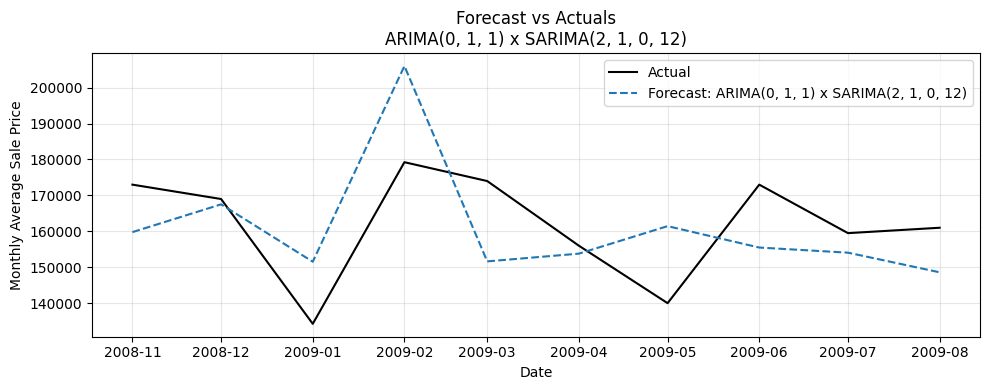

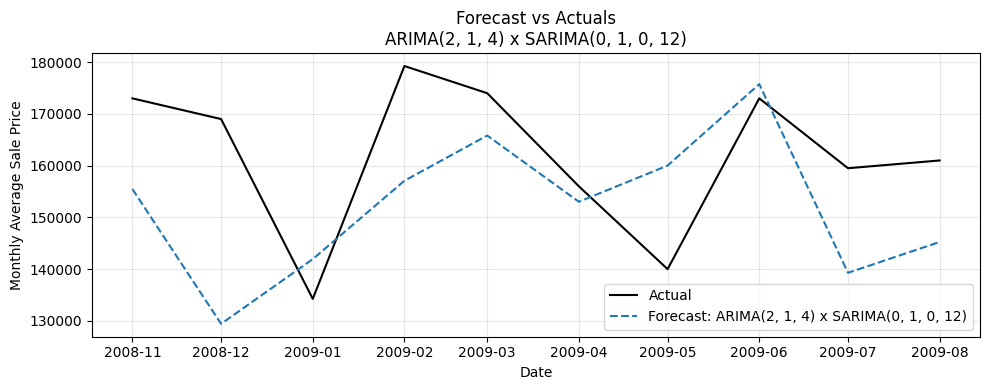

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming 'monthly_avg' is a DataFrame with a datetime index and a column named 'AverageSalePrice'
# Make sure the index is datetime formatted
monthly_avg.index = pd.to_datetime(monthly_avg.index)

# Split dataset
n = len(monthly_avg)
split = int(n * 0.8)
split2 = int(n * 0.6)

train = pd.concat([monthly_avg.iloc[:split2], monthly_avg.iloc[split:]])
test = monthly_avg.iloc[split2:split]

# Specify combinations
non_seasonal_orders = [
    (1,1,1), (1,1,0), (0,1,1), (0,1,0),
    (2,1,2), (2,1,0), (0,1,2), (0,1,3),
    (2,1,3), (2,1,4), (3,1,3), (3,1,4)
]

seasonal_orders = [
    (1,1,1,12), (1,1,0,12), (0,1,1,12), (0,1,0,12),
    (2,1,2,12), (2,1,0,12), (0,1,2,12), (0,1,3,12),
    (2,1,3,12), (2,1,4,12), (3,1,3,12), (3,1,4,12)
]

# Dictionary to hold results
results = {}

# Loop over combinations
for ns_order in non_seasonal_orders:
    for s_order in seasonal_orders:
        label = f'ARIMA{ns_order} x SARIMA{s_order}'
        preds = []
        actuals = []
        history = train.copy()

        for t in range(len(test) - 1):  # Adjusted to avoid going out of bounds
            try:
                model = SARIMAX(history,
                                order=ns_order,
                                seasonal_order=s_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False).fit(disp=False)

                forecast = model.forecast(steps=1).iloc[0]
                actual = test['AverageSalePrice'].iloc[t + 1]  # Shift actuals forward by one

                preds.append(forecast)
                actuals.append(actual)

                # Update history with current actual value
                history = pd.concat([history, test.iloc[[t]]])

            except Exception as e:
                # Skip this combination if the model fails to converge
                print(f"Model {label} failed: {e}")
                break

        if len(actuals) > 0:  # Save only successful runs
            errors = np.array(actuals) - np.array(preds)
            var_error = np.var(errors)

            results[label] = {
                'Forecasts': preds,
                'Actuals': actuals,
                'Errors': errors,
                'Variance of Forecast Error': var_error
            }

# Create summary DataFrame and get best two models
summary_df = pd.DataFrame([
    {'Model': name, 'Forecast Error Variance': res['Variance of Forecast Error']}
    for name, res in results.items()
]).sort_values('Forecast Error Variance').reset_index(drop=True)

print(summary_df)

# Plot only top 2 models
for name in summary_df['Model'][:2]:
    res = results[name]
    x = test.index[1:len(res['Actuals'])+1]  # Adjust x to match shifted actuals
    actuals = np.array(res['Actuals'])
    forecasts = np.array(res['Forecasts'])

    plt.figure(figsize=(10, 4))
    plt.plot(x, actuals, label='Actual', color='black')
    plt.plot(x, forecasts, label=f'Forecast: {name}', linestyle='--')
    plt.title(f'Forecast vs Actuals\n{name}')
    plt.xlabel('Date')
    plt.ylabel('Monthly Average Sale Price')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
